# Introducción a Keras

Vamos a hacer una introducción a Keras en este cuaderno. Lo primero será importar los módulos habituales:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
plt.rcParams["figure.figsize"] = [16,9]
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

## Keras Sequential Interface

Vamos a empezar con una introducción al interfaz secuencial de Keras. Keras tiene varios interfaces (`Sequential`, `Functional`...), pero vamos a comenzar con el secuencial. Define una red neuronal como una secuencia de pasos.



Importamos dos tipos de capas:

- `Dense`: multiplicación de matrices
- `Activation` que no es más que una función de activación.

En la variable `model` especificamos la red como una lista de capas

- La primera capa es densa tiene una entrada de 784 características como un vector, y una dimensión de 32 nodos ocultos
- Una capa de activación ReLU
- Otra capa densa que será la capa de salida ya que es la última, con una activación SoftMax.

Con esta red estaremos trabajando sobre MNIST, con 784 características de entrada como ya hemos dicho y 10 tareas de clasificación de diferentes clases.

Para la primera capa tenemos que especificar las dimensiones de entrada para que la red sea capaz de reservar el espacio necessario para las matrices de las diferentes capas. La red determina el tamaño de la entrada de cada capa automática:

- La primera capa densa tendrá una dimensión de (784, 32)
- La segunda, tendrá una dimensión de (32,10):


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

Using TensorFlow backend.


También podemos especificar el modelo empezando con una instancia vacía de `Sequential` e ir añadiendo con el método `add` las capas una a una:

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

También podemos especificar de manera más compacta todas las capas simultáneamente pasándolas como parámetro en una lista a la clase `Sequential`:

In [ ]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

Al hacer esto, también podemos especificar las activaciones de cada una de las capas densas como parámetro de cada una de los elementos de la lista en vez de como capa separada:

In [ ]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

Un método muy interesante de que dispone el modelo es `summary`, que nos permite ver de un vistazo las diferentes dimensiones de entrada de cada capa y el número de parámetros que contiene.

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Puede observarse en el número de parámetros que están considerados todos los componentes del vector de biases:

In [ ]:
(32)*(784) + 32

25120

In [ ]:
32*10 + 10

330

El número de parámetros en la red, como ya se mencionó, es una manera de caracterizar el nivel de grados de libertad y por tanto la complejidad de la red. En este caso, aunque la red es muy pequeña, tenemos 25000 parámetros que aprender.

Compilamos el modelo invocando al método `compile` y pasándole como parámetros le optimizador, la función de pérdida a utilizar y la métrica que estamos interesados en obtener.

Usamos adam optimizer, que es una buena elección de partida (consultar siempre la documentación). Para una salida Softmax, `categorical_crossentropy` es el parámetro que debemos utilizar.

Fijar la métrica en `accuracy` nos va a ayudar en medir el rendimiento de generalización y la convergencia de la red.

In [ ]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

## Carga de datos y entrenamiento

Como hemos dicho, vamos a trabajar con MNIST. 

In [ ]:
from keras.datasets import mnist
import keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


Hacemos preprocesado de los datos que acabamos de cargar, hacemos un reshape para aplanar las imágenes, cambiamos los pixels a float y normalizamos los valores por el máximo que es 255 (este escalado funciona mejor que un minmax, que escalaría por pixel y no es lo que queremos). Es 255 porque son imágenes en tonos de gris con valores de pixel de 0 a 255.

Tenemos que hacer *une hot encoding* de la variable objetivo para que la capa de salida, que tiene 10 unidades, tenga las dimensiones correctas. Para ello utilizamos un método de la clase `utils` de Keras pensado exclusivamente para esto que se llama `to_categorical`:

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


Para entrenar el modelo con nuestros datso de entrada, llamamos al método `fit` (similar a Scikit-Learn). En Keras `fit` admite bastantes argumentos como se puede ver en la [https://keras.io/api/models/model_training_apis/#fit-method](documentación).

Configuramos el tamaño del lote a 128, y hacemos que el entrenamiento funcione por 10 épocas:

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.5066 - accuracy: 0.8610
Epoch 2/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.2444 - accuracy: 0.9311
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1984 - accuracy: 0.9432
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1708 - accuracy: 0.9509
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1511 - accuracy: 0.9566
Epoch 6/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1368 - accuracy: 0.9606
Epoch 7/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1260 - accuracy: 0.9633
Epoch 8/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1164 - accuracy: 0.9657
Epoch 9/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1088 - accuracy: 0.9678
Epoch 10/10
60000/60000 [==============================

La pérdida que mostramos aquí es la entropía cruzada que decrece con el entrenamiento y la precisión de entrenamiento va incrementándose hasta llegar a un número que no es demasiado bueno para MNIST, pero que dada la red tan pequeña que hemos configurado no está mal.

Ahora lo que podemos hacer es evaluar el modelo en el conjunto de test, utilizando el método `evaluate`, que es similar a `score` en Scikit-Learn y nos devuleve una tupla con la pérdida y la precisión.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.122
Test Accuracy: 0.964


Como hemos dicho, los resultados no son muy buenos pero para la arquitectura de red que tenemos no están tan mal.

In [ ]:
# Recreamos para resetear
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

Ahora hacemos un split de validación, en este caso estamos reservando el 10% de los datos.

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.5560 - accuracy: 0.8482 - val_loss: 0.2425 - val_accuracy: 0.9320
Epoch 2/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.2673 - accuracy: 0.9249 - val_loss: 0.1887 - val_accuracy: 0.9493
Epoch 3/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.2160 - accuracy: 0.9390 - val_loss: 0.1641 - val_accuracy: 0.9552
Epoch 4/10
54000/54000 [==============================] - 2s 29us/step - loss: 0.1844 - accuracy: 0.9477 - val_loss: 0.1486 - val_accuracy: 0.9615
Epoch 5/10
54000/54000 [==============================] - 2s 32us/step - loss: 0.1631 - accuracy: 0.9529 - val_loss: 0.1382 - val_accuracy: 0.9630
Epoch 6/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.1445 - accuracy: 0.9589 - val_loss: 0.1342 - val_accuracy: 0.9637
Epoch 7/10
54000/54000 [==============================] - 2s 29us/ste

Ahora tenemos también la pérdida y la precisión en el conjunto de validación. La que realmente nos interesa es la de más a la derecha (precisión de validación), que nos está indicando cómo están generalizado la red.

Lo único garantizado en entrenamiento es que la pérdida de entrenamiento irá decreciendo. En este caso la red no llega a hacer sobreajuste.

## Loggers y Callbacks

Keras nos da un callback devuelto de la llamada al método `fit` que nos dará más detalles de lo que está pasando almacenando los resultados de una manera ordenada:

In [ ]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_callback = model.fit(X_train, y_train, batch_size=128,
                             epochs=100, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 2s 31us/step - loss: 0.5546 - accuracy: 0.8475 - val_loss: 0.2523 - val_accuracy: 0.9327
Epoch 2/100
54000/54000 [==============================] - 2s 29us/step - loss: 0.2722 - accuracy: 0.9227 - val_loss: 0.1997 - val_accuracy: 0.9437
Epoch 3/100
54000/54000 [==============================] - 2s 29us/step - loss: 0.2224 - accuracy: 0.9357 - val_loss: 0.1691 - val_accuracy: 0.9542
Epoch 4/100
54000/54000 [==============================] - 2s 30us/step - loss: 0.1922 - accuracy: 0.9441 - val_loss: 0.1511 - val_accuracy: 0.9607
Epoch 5/100
54000/54000 [==============================] - 2s 29us/step - loss: 0.1707 - accuracy: 0.9496 - val_loss: 0.1453 - val_accuracy: 0.9608
Epoch 6/100
54000/54000 [==============================] - 2s 30us/step - loss: 0.1549 - accuracy: 0.9551 - val_loss: 0.1388 - val_accuracy: 0.9612
Epoch 7/100
54000/54000 [==============================] - 2s 3

El callback devuelto es un diccionario, lo convertimos a un dataframe de Pandas y visualizamos, para ver las pérdidas y precisión de entrenamiento y validación.

In [ ]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['accuracy', 'val_accuracy']].plot()
    plt.ylabel("precisión")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("pérdida")

Text(0, 0.5, 'pérdida')

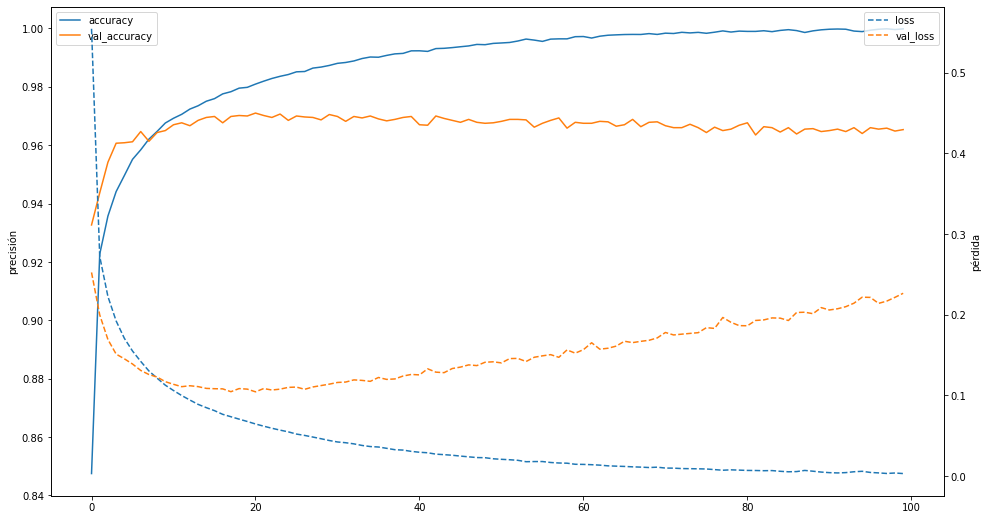

In [ ]:
df = pd.DataFrame(history_callback.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("precisión")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("pérdida")

Con un mayor número de épocas, vemos que el error de validación se incrementa, así que probablemente la red ha comenzado a sobreajustar los datos de entrenamiento.